## USING 2 STEP BONUS MALUS SYSTEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data2.csv')
# df.head()
# df.columns

In [3]:
len(df.columns)

27

In [4]:
# Convert Insured Column to categorical values
df['Insured'] = df['Insured'].map({'Yes': 0, 'No': 1})

# Convert Motive Column to categorical values
df['Motive'] = df['Motive'].map({'Requirements by company/government': 0, 'Recommendations from friends/family': 1,
                                                         'Necessity after a loss': 2, 'Other': 3})

# Convert Gender to categorical
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

# Convert Age Range to categorical
df['Age range'] = df['Age range'].map({'21-30':0, '31-40':1, '41-50':2, 'Above 50':3})

# Convert Occupation to categorical
df['Occupation'] = df['Occupation'].map({'Informal':0, 'Formal':1})

# Convert Education level to categorical
df['Education level'] = df['Education level'].map({'Primary School':0, 'High School':1, 'Certificate/Diploma':2, 'Degree':3, 'Masters':4})


# Convert Social Class to categorical
df['Social Class'] = df['Social Class'].map({'C1':0, 'C2':1, 'C3':2, 'C4':3})


# Convert Area of Residence to categorical
df['Area of Residence'] = df['Area of Residence'].map({'Rural':0, 'Urban':1})


# Convert 'Number of Adults' to categorical
df['Number of Adults'] = df['Number of Adults'].map({'1':0, '2':1, '3':2, '4+':3})

# Convert 'Number of Adults' to categorical
df['Number of Children'] = df['Number of Children'].map({'0':0, '1':1, '2':2, '3+':3})


# Convert 'Income Range to categorical
df['Income Range'] = df['Income Range'].map({'Below 6000':0, '6000 - 10000':1, '10000 - 15000':2, '15000 - 20000':3,
                                              '20000 - 25000':4, '25000 - 30000':5, 'Above 30000':6})


# Convert Time of Cover to categorical
df['Time of Cover'] = df['Time of Cover'].map({'1 year':0, '2 years':1, '3 years':2, 'More than 3 years':3})

# Convert Premium to categorical
df['Premium'] = df['Premium'].map({'500 - 1000':0, '1000 - 2000':1, '2000 - 3000':2, 'Above 3000':3})


# Convert Method of Payment to categorical
df['Method of Payment'] = df['Method of Payment'].map({'Cash':0, 'Mobile Money (M-Pesa/Airtel/Other)':1, 'Bank Transfers':2, 'Cheques':3})


# Convert Loss or Damage to categorical
df['Loss or Damage'] = df['Loss or Damage'].map({'Yes':0, 'No':1})


# Convert Claim to categorical
df['Claim'] = df['Claim'].map({'Yes':0, 'No':1})

# Convert Ability.to.Recover to categorical
df['Ability to Recover'] = df['Ability to Recover'].map({'I was able to repair my home and prevent further damage':0, 'Nothing changed':1})


# Convert Borrow.money.or.sell.assets.to.cover.loss to categorical
df['Borrow money or sell assets to cover loss'] = df['Borrow money or sell assets to cover loss'].map({'Yes, I had to borrow money':0,
                                                                                                        'Yes, I had to sell assets':1, 'No':2})


# Convert Claim.help.to.avoid.debt.or.financial.hardship to categorical
df['Claim help to avoid debt or financial hardship'] = df['Claim help to avoid debt or financial hardship'].map({'Yes':0, 'No':1})

# Convert Claim.help.maintain.income.or.business to categorical
df['Claim help maintain income or business'] = df['Claim help maintain income or business'].map({'Yes':0, 'No':1})


# Convert Post claim capital range to categorical
df['Post claim capital range'] = df['Post claim capital range'].map({'Below 6000':0, '6000 - 10000':1, '10000 - 15000':2, 
                                                                     '15000 - 20000':3, '20000 - 25000':4, '25000 - 30000':5, 'Above 30000':6})


# Convert Claim.challenge to categorical
df['Claim challenge'] = df['Claim challenge'].map({'Yes':0, 'No':1})


# Convert Claim.challenge.reason to categorical
df['Claim challenge reason'] = df['Claim challenge reason'].map({"Understanding the policy":0, "Meeting eligibility requirements":1,
                                                                 "Dealing with delays":2,"Insurer may deny coverage or offer less coverage than expected.":3})


# Convert Premium Change to categorical
df['Premium Change'] = df['Premium Change'].map({"Yes":0, "No":1})


# Convert Cost.of.Insurance ability to maintain payment to categorical
df['Cost of Insurance ability to maintain payment'] = df['Cost of Insurance ability to maintain payment'].map({"The cost of Formal has not affected my ability to maintain coverage or make payments.":0,
                                                                                                                "The cost of Formal has caused me to reduce my coverage to lower my premiums.":1,"The cost of Formal has caused me to make payments late or miss payments.":2,"The cost of Formal has caused me to forgo Formal coverage altogether.":3,"Other":4})

# Convert Effects of changes in premium on income or businessf.Insurance ability to maintain payment to categorical
df['Effects of changes in premium on income or business'] = df['Effects of changes in premium on income or business'].map({"My income or business has not been affected by any changes in insurance coverage or premiums.":0, "My income or business has been negatively affected by an increase in insurance premiums.":1,"My income or business has been positively affected by a decrease in insurance premiums.":2,"I have had to allocate more of my income or business resources to pay for insurance coverage.":3,
                                                                                                                           "I have had to reduce other expenses or investments to maintain insurance coverage.":4,"Other":5})



In [5]:
from sklearn.impute import KNNImputer

# Identify the columns with missing values
columns_with_missing = ['Occupation', 'Motive', 'Education level', 'Area of Residence', 'Income Range',
                        'Time of Cover', 'Number of Insurers', 'Premium', 'Method of Payment',
                        'Loss or Damage', 'Claim', 'Post claim capital range', 'Premium Change',
                        'Cost of Insurance ability to maintain payment', 'Effects of changes in premium on income or business']

# Create a KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the identified columns
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])


In [6]:
# convert all float data to integers
data = df.astype(int, errors='ignore')
# data

In [25]:
data.to_csv('new_data3.csv', index=False)

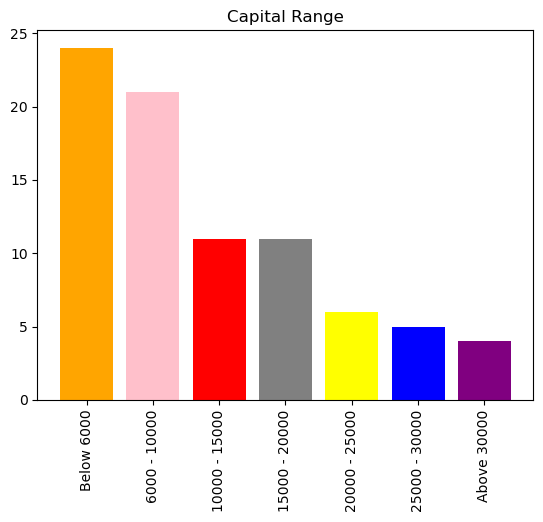

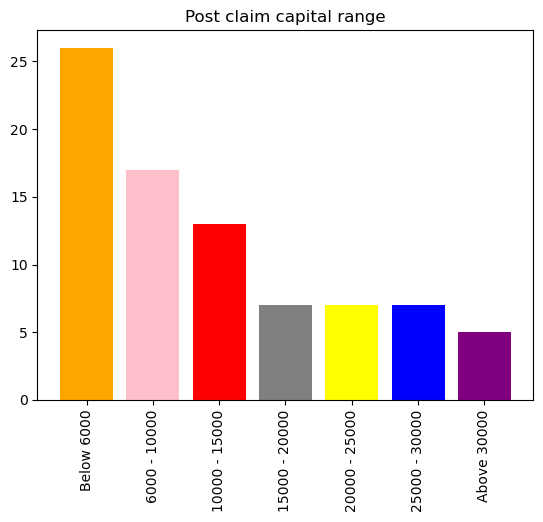

In [7]:
# Create a frequency table and bar plot for Income Range
t5 = data['Income Range'].value_counts()
prop5 = t5 / len(data) * 100
plt.bar(x=['Below 6000', '6000 - 10000', '10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', 'Above 30000'], height=t5, color=['orange', 'pink', 'red', 'grey', 'yellow', 'blue', 'purple'])
plt.xticks(rotation=90)
plt.title('Capital Range')
plt.show()



t9 = data['Post claim capital range'].value_counts()
prop9 = t9 / len(data) * 100
plt.bar(x=['Below 6000', '6000 - 10000', '10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', 'Above 30000'], height=t9, color=['orange', 'pink', 'red', 'grey', 'yellow', 'blue', 'purple'])
plt.title('Post claim capital range')
plt.xticks(rotation=90)
plt.show()



In [8]:
inLevels = data['Income Range'].unique().tolist()
inLevels.sort()

P = np.zeros((7, 7))
for i in inLevels:
    for j in inLevels:
        temp = data['Post claim capital range'][data['Income Range'] == i] 
        prop = (temp == j).sum() / (data['Income Range'] == i).sum()
        P[i,j] = prop


pd.DataFrame(P)


,0,1,2,3,4,5,6
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.250000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000
3,0.090909,0.181818,0.000000,0.636364,0.000000,0.090909,0.000000
4,0.000000,0.000000,0.166667,0.000000,0.666667,0.000000,0.166667
5,0.000000,0.000000,0.083333,0.000000,0.000000,0.666667,0.250000
6,0.000000,0.000000,0.047619,0.000000,0.047619,0.000000,0.904762


**FUNDAMENTAL MATRIX**

In [17]:
P2 = np.fliplr(np.flipud(P))

Q2 = P2[0:5, 0:5]

I2_t = np.eye(Q2.shape[0])

F2 = np.linalg.inv(I2_t - Q2)

print(F2)
# pd.DataFrame(P2)

[[ 1.40000000e+01 -7.40148683e-16  2.00000000e+00 -0.00000000e+00
   4.00000000e+00]
 [ 1.05000000e+01  3.00000000e+00  1.50000000e+00 -0.00000000e+00
   4.00000000e+00]
 [ 7.00000000e+00 -3.70074342e-16  4.00000000e+00  0.00000000e+00
   4.00000000e+00]
 [ 2.62500000e+00  7.50000000e-01  3.75000000e-01  2.75000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   4.00000000e+00]]


**VECTOR T**

In [18]:
one = np.ones((5,1))
t = F2.dot(one)
t

array([[20. ],
       [19. ],
       [15. ],
       [ 7.5],
       [ 4. ]])

**B = FR**

In [19]:
R = P2[0:5, 5:7]
B2 = F2.dot(R) 
B2

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ]])

**P1^{k}**

In [20]:
# def mpow(P,n):
#     if n == 0:
#         return np.eye(P.shape[0])
#     elif n == 1:
#         return P
#     else:
#         return np.dot(P, mpow(P, n - 1))


def mpow(P,n):
    return np.linalg.matrix_power(P,n)

In [23]:
P2_pow = mpow(P2,30)
P2_pow
# pd.DataFrame(P2_pow)

array([[1.17611070e-01, 0.00000000e+00, 2.09176982e-02, 0.00000000e+00,
        4.91748230e-02, 0.00000000e+00, 8.12296409e-01],
       [1.09817916e-01, 5.21509505e-06, 1.95260454e-02, 0.00000000e+00,
        4.58926507e-02, 0.00000000e+00, 8.24758173e-01],
       [7.32119437e-02, 0.00000000e+00, 1.30225787e-02, 0.00000000e+00,
        3.08262564e-02, 0.00000000e+00, 8.82939221e-01],
       [3.34921681e-02, 1.17701942e-05, 5.94758636e-03, 1.29169698e-06,
        1.39475491e-02, 4.99999354e-01, 4.46600280e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.78582090e-04, 0.00000000e+00, 9.99821418e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

**VISUALIZATION OF THE MATRIX**

In [24]:
#PROB OF BEING ABSORBED BY 0
def abs_s0(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 6])
    return prob
                    
#PROB OF BEING ABSORBED BY 1
def abs_s1(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 5])
    return prob

In [25]:
def class0_prob_2(P,n):
    new = []
    for i in abs_s0(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class0_prob_3(P,n):
    new = []
    for i in abs_s0(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class0_prob_4(P,n):
    new = []
    for i in abs_s0(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class0_prob_5(P,n):
    new = []
    for i in abs_s0(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class0_prob_6(P,n):
    new = []
    for i in abs_s0(P,n):
        row = i[0]
        new.append(row)
    return(new)

In [26]:
def class1_prob_2(P,n):
    new = []
    for i in abs_s1(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class1_prob_3(P,n):
    new = []
    for i in abs_s1(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class1_prob_4(P,n):
    new = []
    for i in abs_s1(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class1_prob_5(P,n):
    new = []
    for i in abs_s1(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class1_prob_6(P,n):
    new = []
    for i in abs_s1(P,n):
        row = i[0]
        new.append(row)
    return(new)

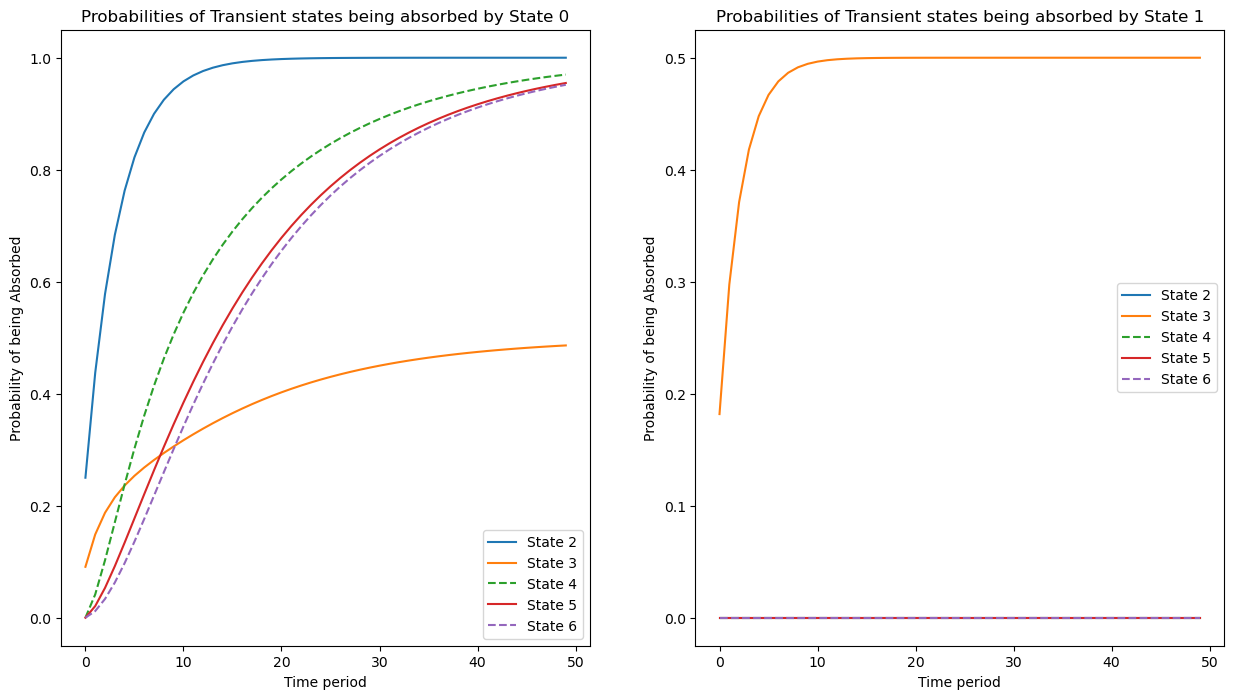

In [27]:
t = np.arange(50)
x02 = class0_prob_2(P2,(len(t)+1))
x03 = class0_prob_3(P2,(len(t)+1))
x04 = class0_prob_4(P2,(len(t)+1))
x05 = class0_prob_5(P2,(len(t)+1))
x06 = class0_prob_6(P2,(len(t)+1))


y02 = class1_prob_2(P2,(len(t)+1))
y03 = class1_prob_3(P2,(len(t)+1))
y04 = class1_prob_4(P2,(len(t)+1))
y05 = class1_prob_5(P2,(len(t)+1))
y06 = class1_prob_6(P2,(len(t)+1))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,8))


ax1.plot(t, x02, label = 'State 2')
ax1.plot(t, x03, label = 'State 3')
ax1.plot(t, x04, linestyle='--', label = 'State 4')
ax1.plot(t, x05, label = 'State 5')
ax1.plot(t, x06, linestyle='--', label = 'State 6')

ax1.legend()

ax1.set_xlabel('Time period')
ax1.set_ylabel('Probability of being Absorbed')
ax1.set_title('Probabilities of Transient states being absorbed by State 0')


ax2.plot(t, y02, label = 'State 2')
ax2.plot(t, y03, label = 'State 3')
ax2.plot(t, y04, linestyle='--', label = 'State 4')
ax2.plot(t, y05, label = 'State 5')
ax2.plot(t, y06, linestyle='--', label = 'State 6')

ax2.legend()

ax2.set_xlabel('Time period')
ax2.set_ylabel('Probability of being Absorbed')
ax2.set_title('Probabilities of Transient states being absorbed by State 1')

plt.show()

In [209]:
P2_powe = mpow(P2,30)
P2_powe
# pd.DataFrame(P2_powe)

array([[1.17611070e-01, 0.00000000e+00, 2.09176982e-02, 0.00000000e+00,
        4.91748230e-02, 0.00000000e+00, 8.12296409e-01],
       [1.09817916e-01, 5.21509505e-06, 1.95260454e-02, 0.00000000e+00,
        4.58926507e-02, 0.00000000e+00, 8.24758173e-01],
       [7.32119437e-02, 0.00000000e+00, 1.30225787e-02, 0.00000000e+00,
        3.08262564e-02, 0.00000000e+00, 8.82939221e-01],
       [3.34921681e-02, 1.17701942e-05, 5.94758636e-03, 1.29169698e-06,
        1.39475491e-02, 4.99999354e-01, 4.46600280e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.78582090e-04, 0.00000000e+00, 9.99821418e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

**VARIANCE OF NO. OF VISITS(F2)**

In [221]:
F_d = np.diagflat(np.diag(F2))
F_q = F2 * F2
F2_2 = (F2.dot(2 * F_d - I2_t)) - F_q
pd.DataFrame(F2_2)

,0,1,2,3,4
0,182.000000,-3.700743e-15,10.000000,0.0000,12.0
1,173.250000,6.000000e+00,8.250000,0.0000,12.0
2,140.000000,-1.850372e-15,12.000000,0.0000,12.0
3,63.984375,3.187500e+00,2.484375,4.8125,6.0
4,0.000000,0.000000e+00,0.000000,0.0000,12.0


**VARIANCE OF NUMBER OF STEPS(t2)**

In [216]:
t = 5

In [222]:
t_q = t * t
t2_2 = (((2 * F2) - I2_t).dot(t)) - t_q
pd.DataFrame(t2_2)

,0,1,2,3,4
0,110.00,-2.500000e+01,-5.00,-25.0,15.0
1,80.00,-7.105427e-15,-10.00,-25.0,15.0
2,45.00,-2.500000e+01,10.00,-25.0,15.0
3,1.25,-1.750000e+01,-21.25,-2.5,-15.0
4,-25.00,-2.500000e+01,-25.00,-25.0,10.0


## SPLIT THE DATA TO INSURED CLAIM AND NON INSURED CLAIM, INSURED NO CLAIM AND NON INSURED NO CLAIM

**INSURED CLAIM**

In [28]:
insured_df = data[data['Insured'] == 0]
# claim_insu = insured_df[insured_df['Claim'] == 0]

inLevels = insured_df['Income Range'].unique().tolist()
inLevels.sort()

P = np.zeros((7, 7))
for i in inLevels:
    for j in inLevels:
        temp = insured_df['Post claim capital range'][insured_df['Income Range'] == i] 
        prop = (temp == j).sum() / (insured_df['Income Range'] == i).sum()
        P[i,j] = prop


# pd.DataFrame(P)
P

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.        , 0.75      , 0.        , 0.        ,
        0.        , 0.        ],
       [0.1       , 0.2       , 0.        , 0.7       , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8       ,
        0.        , 0.2       ],
       [0.        , 0.        , 0.09090909, 0.        , 0.        ,
        0.68181818, 0.22727273],
       [0.        , 0.        , 0.0625    , 0.        , 0.0625    ,
        0.        , 0.875     ]])

In [33]:
# P2_insured = np.array([[0.7500, 0.0000, 0.0000, 0.0000, 0.0000, 0.2500, 0.0000],
#                        [0.0000, 0.7000, 0.0000, 0.0000, 0.0000, 0.1000, 0.2000],
#                        [0.0000, 0.0000, 0.8000, 0.0000, 0.2000, 0.0000, 0.0000],
#                        [0.0909, 0.0000, 0.0000, 0.6818, 0.2273, 0.0000, 0.0000],
#                        [0.0625, 0.0000, 0.0625, 0.0000, 0.8750, 0.0000, 0.0000],
#                        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000],
#                        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000]])
P2_insured = np.fliplr(np.flipud(P))

Q2_insured = P2_insured[0:5, 0:5]

I2_t_insured = np.eye(Q2_insured.shape[0])

F2_insured = np.linalg.inv(I2_t_insured - Q2_insured)
print(P2_insured)


[[0.875      0.         0.0625     0.         0.0625     0.
  0.        ]
 [0.22727273 0.68181818 0.         0.         0.09090909 0.
  0.        ]
 [0.2        0.         0.8        0.         0.         0.
  0.        ]
 [0.         0.         0.         0.7        0.         0.2
  0.1       ]
 [0.         0.         0.         0.         0.75       0.
  0.25      ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  1.        ]]


**VECTOR T**

In [35]:
one = np.ones((5,1))
t_insured = F2_insured.dot(one)
t_insured

array([[25.        ],
       [22.14285714],
       [30.        ],
       [ 3.33333333],
       [ 4.        ]])

**B MATRIX**

In [36]:
R = P2_insured[0:5, 5:7]
B2_insured = F2_insured.dot(R) 
B2_insured

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ]])

**MATRIX POWER**

In [38]:
P2_insured_pow = mpow(P2_insured,30)
P2_insured_pow

array([[1.67812969e-01, 0.00000000e+00, 6.74608599e-02, 0.00000000e+00,
        5.11045265e-02, 0.00000000e+00, 7.13621645e-01],
       [1.39459326e-01, 1.02342812e-05, 5.59798948e-02, 0.00000000e+00,
        4.27351701e-02, 0.00000000e+00, 7.61815375e-01],
       [2.15874752e-01, 0.00000000e+00, 8.68599368e-02, 0.00000000e+00,
        6.54253335e-02, 0.00000000e+00, 6.31839978e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.25393403e-05,
        0.00000000e+00, 6.66651640e-01, 3.33325820e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.78582090e-04, 0.00000000e+00, 9.99821418e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

**VISUALIZE THE MATRIX**

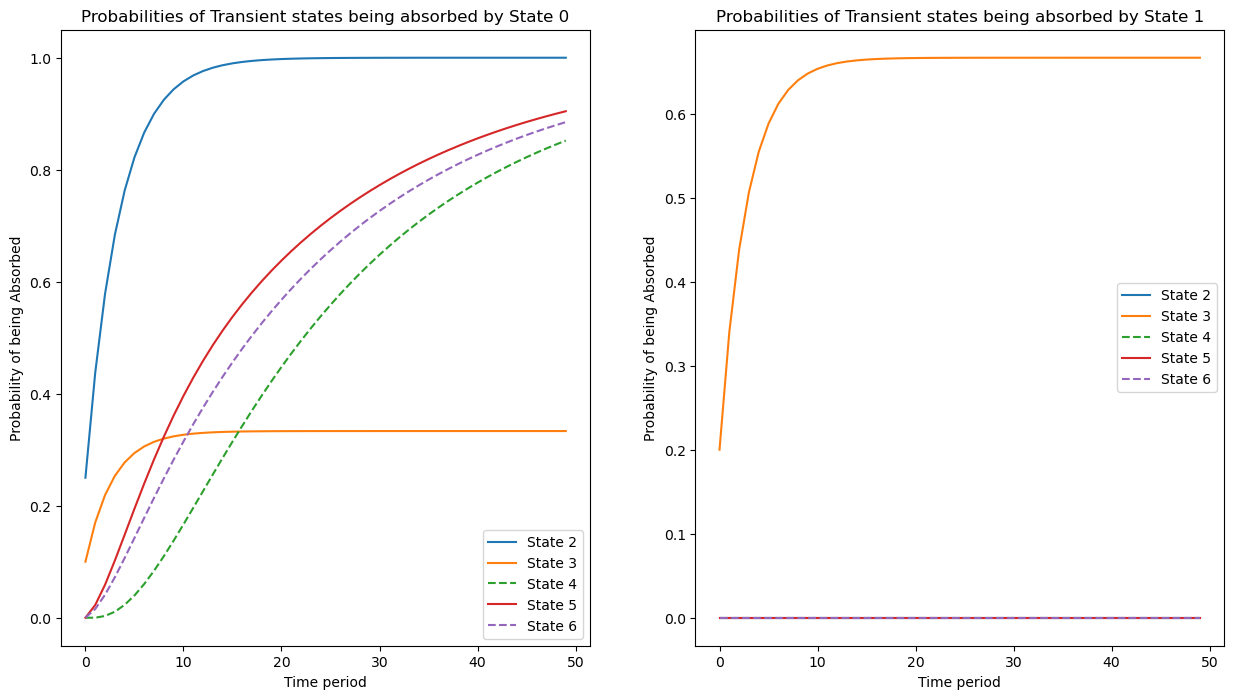

In [40]:
t = np.arange(50)
x02 = class0_prob_2(P2_insured,(len(t)+1))
x03 = class0_prob_3(P2_insured,(len(t)+1))
x04 = class0_prob_4(P2_insured,(len(t)+1))
x05 = class0_prob_5(P2_insured,(len(t)+1))
x06 = class0_prob_6(P2_insured,(len(t)+1))


y02 = class1_prob_2(P2_insured,(len(t)+1))
y03 = class1_prob_3(P2_insured,(len(t)+1))
y04 = class1_prob_4(P2_insured,(len(t)+1))
y05 = class1_prob_5(P2_insured,(len(t)+1))
y06 = class1_prob_6(P2_insured,(len(t)+1))


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,8))


ax1.plot(t, x02, label = 'State 2')
ax1.plot(t, x03, label = 'State 3')
ax1.plot(t, x04, linestyle='--', label = 'State 4')
ax1.plot(t, x05, label = 'State 5')
ax1.plot(t, x06, linestyle='--', label = 'State 6')

ax1.legend()

ax1.set_xlabel('Time period')
ax1.set_ylabel('Probability of being Absorbed')
ax1.set_title('Probabilities of Transient states being absorbed by State 0')


ax2.plot(t, y02, label = 'State 2')
ax2.plot(t, y03, label = 'State 3')
ax2.plot(t, y04, linestyle='--', label = 'State 4')
ax2.plot(t, y05, label = 'State 5')
ax2.plot(t, y06, linestyle='--', label = 'State 6')

ax2.legend()

ax2.set_xlabel('Time period')
ax2.set_ylabel('Probability of being Absorbed')
ax2.set_title('Probabilities of Transient states being absorbed by State 1')

plt.show()

## CHANGING NOW ALL THE INSURED TO NON INSURED

In [41]:
non_insured_df = data[data['Insured'] == 1]
claim_non_insured_df = non_insured_df[non_insured_df['Loss or Damage'] == 0]

In [42]:
before =  claim_non_insured_df['Income Range']
after = claim_non_insured_df['Post claim capital range']

change = after - before

import statistics
mode = statistics.mode(change)
mode

0

In [43]:
cap_range = insured_df['Income Range']
insured_df['post_new'] = insured_df['Income Range']
insured_df['post_new']

C:\Users\Academic\AppData\Local\Temp\ipykernel_14532\838419487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insured_df['post_new'] = insured_df['Income Range']


0     3
1     5
2     5
5     4
6     6
     ..
76    5
77    5
78    5
79    4
80    3
Name: post_new, Length: 66, dtype: int32

## NOW WHAT IF WE LOOK AT THE POSITIVE SIDE,INSTEAD OF ABSORPTION BY ABSORBING STATES, WE LOOK AT ABSORPTION BY HIGHER TRANSIENT STATE.

In [44]:
def abs_s2(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 4])
    return prob
                    

def abs_s3(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 3])
    return prob


def abs_s4(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 2])
    return prob

def abs_s5(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 1])
    return prob

def abs_s6(P,n):
    prob = []
    for i in range (1,n):
        P_pow = mpow(P,i)
        prob.append(P_pow[0:5, 0])
    return prob

In [45]:
# PROB OF MOVING TO CLASS 2

def class2_prob_2(P,n):
    new = []
    for i in abs_s2(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class2_prob_3(P,n):
    new = []
    for i in abs_s2(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class2_prob_4(P,n):
    new = []
    for i in abs_s2(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class2_prob_5(P,n):
    new = []
    for i in abs_s2(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class2_prob_6(P,n):
    new = []
    for i in abs_s2(P,n):
        row = i[0]
        new.append(row)
    return(new)

In [46]:
# MOVING TO CLASS3
def class3_prob_2(P,n):
    new = []
    for i in abs_s3(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class3_prob_3(P,n):
    new = []
    for i in abs_s3(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class3_prob_4(P,n):
    new = []
    for i in abs_s3(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class3_prob_5(P,n):
    new = []
    for i in abs_s3(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class3_prob_6(P,n):
    new = []
    for i in abs_s3(P,n):
        row = i[0]
        new.append(row)
    return(new)

In [47]:
#MOVING TO CLASS 4
def class4_prob_2(P,n):
    new = []
    for i in abs_s4(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class4_prob_3(P,n):
    new = []
    for i in abs_s4(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class4_prob_4(P,n):
    new = []
    for i in abs_s4(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class4_prob_5(P,n):
    new = []
    for i in abs_s4(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class4_prob_6(P,n):
    new = []
    for i in abs_s4(P,n):
        row = i[0]
        new.append(row)
    return(new)

In [48]:
#MOVING TO CLASS 5
def class5_prob_2(P,n):
    new = []
    for i in abs_s5(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class5_prob_3(P,n):
    new = []
    for i in abs_s5(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class5_prob_4(P,n):
    new = []
    for i in abs_s5(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class5_prob_5(P,n):
    new = []
    for i in abs_s5(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class5_prob_6(P,n):
    new = []
    for i in abs_s5(P,n):
        row = i[0]
        new.append(row)
    return(new)

In [49]:
#MOVING TO CLASS 6
def class6_prob_2(P,n):
    new = []
    for i in abs_s6(P,n):
        row = i[4]
        new.append(row)
    return(new)

def class6_prob_3(P,n):
    new = []
    for i in abs_s6(P,n):
        row = i[3]
        new.append(row)
    return(new)

def class6_prob_4(P,n):
    new = []
    for i in abs_s6(P,n):
        row = i[2]
        new.append(row)
    return(new)

def class6_prob_5(P,n):
    new = []
    for i in abs_s6(P,n):
        row = i[1]
        new.append(row)
    return(new)

def class6_prob_6(P,n):
    new = []
    for i in abs_s6(P,n):
        row = i[0]
        new.append(row)
    return(new)

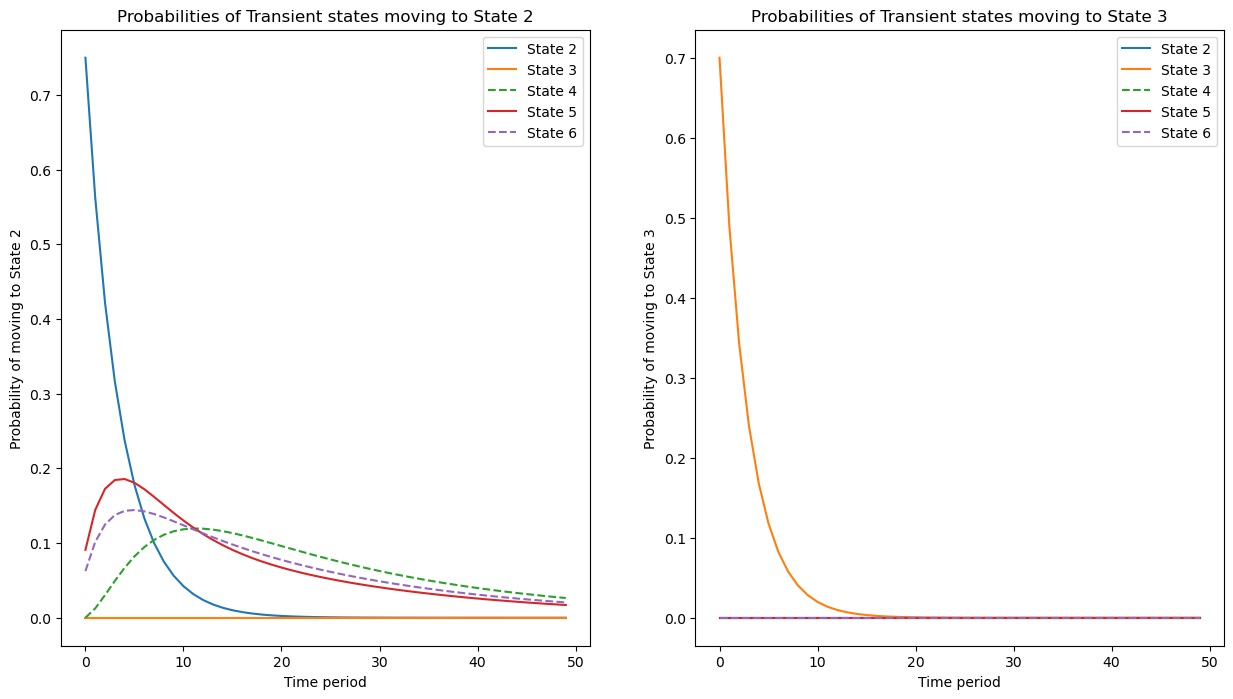

In [51]:
t = np.arange(50)
x02 = class2_prob_2(P2_insured,(len(t)+1))
x03 = class2_prob_3(P2_insured,(len(t)+1))
x04 = class2_prob_4(P2_insured,(len(t)+1))
x05 = class2_prob_5(P2_insured,(len(t)+1))
x06 = class2_prob_6(P2_insured,(len(t)+1))

y02 = class3_prob_2(P2_insured,(len(t)+1))
y03 = class3_prob_3(P2_insured,(len(t)+1))
y04 = class3_prob_4(P2_insured,(len(t)+1))
y05 = class3_prob_5(P2_insured,(len(t)+1))
y06 = class3_prob_6(P2_insured,(len(t)+1))

z02 = class4_prob_2(P2_insured,(len(t)+1))
z03 = class4_prob_3(P2_insured,(len(t)+1))
z04 = class4_prob_4(P2_insured,(len(t)+1))
z05 = class4_prob_5(P2_insured,(len(t)+1))
z06 = class4_prob_6(P2_insured,(len(t)+1))

w02 = class5_prob_2(P2_insured,(len(t)+1))
w03 = class5_prob_3(P2_insured,(len(t)+1))
w04 = class5_prob_4(P2_insured,(len(t)+1))
w05 = class5_prob_5(P2_insured,(len(t)+1))
w06 = class5_prob_6(P2_insured,(len(t)+1))

v02 = class6_prob_2(P2_insured,(len(t)+1))
v03 = class6_prob_3(P2_insured,(len(t)+1))
v04 = class6_prob_4(P2_insured,(len(t)+1))
v05 = class6_prob_5(P2_insured,(len(t)+1))
v06 = class6_prob_6(P2_insured,(len(t)+1))

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,
     figsize = (15,8))


# #plot on state 2
ax1.plot(t, x02, label = 'State 2')
ax1.plot(t, x03, label = 'State 3')
ax1.plot(t, x04, linestyle='--', label = 'State 4')
ax1.plot(t, x05, label = 'State 5')
ax1.plot(t, x06, linestyle='--', label = 'State 6')

ax1.legend()

ax1.set_xlabel('Time period')
ax1.set_ylabel('Probability of moving to State 2')
ax1.set_title('Probabilities of Transient states moving to State 2')


# #plot on state 3
ax2.plot(t, y02, label = 'State 2')
ax2.plot(t, y03, label = 'State 3')
ax2.plot(t, y04, linestyle='--', label = 'State 4')
ax2.plot(t, y05, label = 'State 5')
ax2.plot(t, y06, linestyle='--', label = 'State 6')

ax2.legend()

ax2.set_xlabel('Time period')
ax2.set_ylabel('Probability of moving to State 3')
ax2.set_title('Probabilities of Transient states moving to State 3')







plt.show()

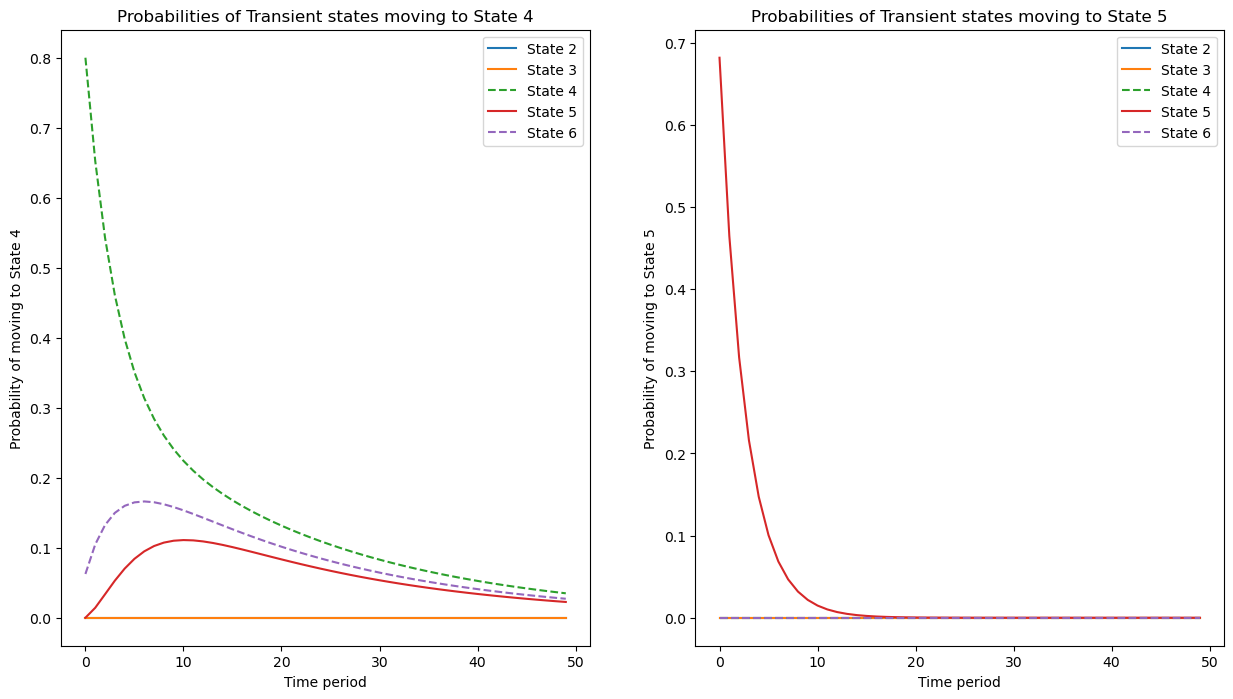

In [52]:
fig, (ax3,ax4) = plt.subplots(nrows=1, ncols=2,
     figsize = (15,8))


#plot on state 4
ax3.plot(t, z02, label = 'State 2')
ax3.plot(t, z03, label = 'State 3')
ax3.plot(t, z04, linestyle='--', label = 'State 4')
ax3.plot(t, z05, label = 'State 5')
ax3.plot(t, z06, linestyle='--', label = 'State 6')

ax3.legend()

ax3.set_xlabel('Time period')
ax3.set_ylabel('Probability of moving to State 4')
ax3.set_title('Probabilities of Transient states moving to State 4')

#plot on state 5
ax4.plot(t, w02, label = 'State 2')
ax4.plot(t, w03, label = 'State 3')
ax4.plot(t, w04, linestyle='--', label = 'State 4')
ax4.plot(t, w05, label = 'State 5')
ax4.plot(t, w06, linestyle='--', label = 'State 6')

ax4.legend()

ax4.set_xlabel('Time period')
ax4.set_ylabel('Probability of moving to State 5')
ax4.set_title('Probabilities of Transient states moving to State 5')

plt.show()

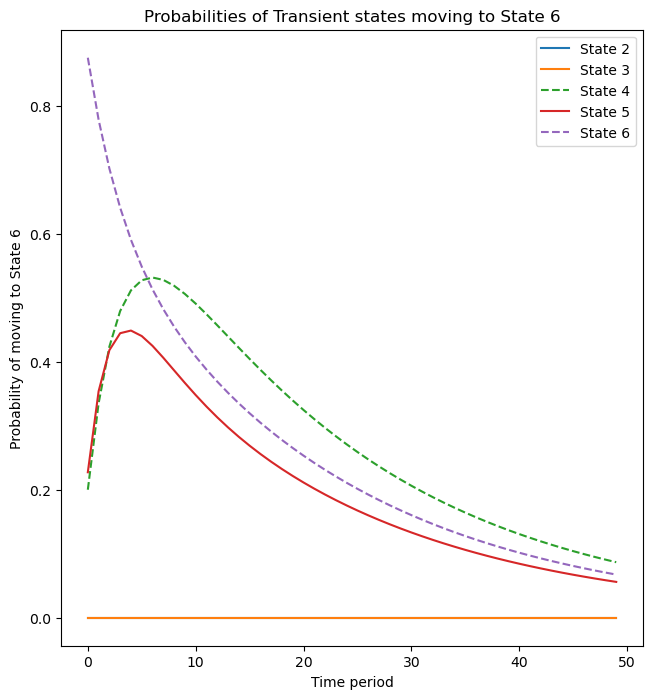

In [53]:
fig, (ax5) = plt.subplots(figsize = (7.5,8))
#plot on state 6
ax5.plot(t, v02, label = 'State 2')
ax5.plot(t, v03, label = 'State 3')
ax5.plot(t, v04, linestyle='--', label = 'State 4')
ax5.plot(t, v05, label = 'State 5')
ax5.plot(t, v06, linestyle='--', label = 'State 6')

ax5.legend()

ax5.set_xlabel('Time period')
ax5.set_ylabel('Probability of moving to State 6')
ax5.set_title('Probabilities of Transient states moving to State 6')

plt.show()


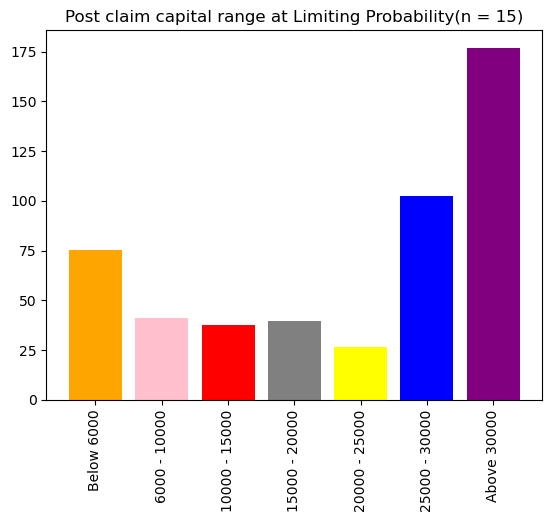

In [23]:
perc = P1[:1][0].tolist()

IR = data["Income Range"]
zero = []
one = []
two = []
three = []
four = []
five = []
six = []

for cl in IR:
    if cl == 0:
        zero.append(cl)
    elif cl == 1:
        one.append(cl)
    elif cl == 2:
        two.append(cl)
    elif cl == 3:
        three.append(cl)
    elif cl == 4:
        four.append(cl)
    elif cl == 5:
        five.append(cl)
    else:
        six.append(cl)


new_class = []
for j in perc:
    new_class.append(j * 500) 

new_class
plt.bar(x=['Below 6000', '6000 - 10000', '10000 - 15000', '15000 - 20000', '20000 - 25000', '25000 - 30000', 'Above 30000'], height=new_class, color=['orange', 'pink', 'red', 'grey', 'yellow', 'blue', 'purple'])
plt.title('Post claim capital range at Limiting Probability(n = 15)')
plt.xticks(rotation=90)
plt.show()

In [25]:
Informal = data[data['Occupation'] == 0]
Formal = data[data['Occupation'] == 1]

In [28]:
# Create a contingency table of two categorical variables
cont_table = pd.crosstab(Formal['Gender'], Formal['Insured'])
cont_table


Insured,0,1
Gender,,
0,63,11
1,77,20
